In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,classification_report

In [6]:
at = pd.read_csv(r"C:\Users\Shree\Desktop\atharva\DSBDA\datasets\heart.csv",sep=',')
at

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
at.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
at.drop_duplicates()
at

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
at.mean(axis=0)

age          54.366337
sex           0.683168
cp            0.966997
trtbps      131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalachh    149.646865
exng          0.326733
oldpeak       1.039604
slp           1.399340
caa           0.729373
thall         2.313531
output        0.544554
dtype: float64

In [13]:
x = at['thall'].mean();
x
at['thall'].fillna(x,inplace=True)
at

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
sub1 = at[:100][['age','sex','cp']]
sub1

,age,sex,cp
0,63,1,3
1,37,1,2
2,41,0,1
3,56,1,1
4,57,0,0
...,...,...,...
95,53,1,0
96,62,0,0
97,52,1,0
98,43,1,2


In [18]:
sub2 = at[:100][['cp','trtbps','chol']]
sub2

,cp,trtbps,chol
0,3,145,233
1,2,130,250
2,1,130,204
3,1,120,236
4,0,120,354
...,...,...,...
95,0,142,226
96,0,140,394
97,0,108,233
98,2,130,315


In [20]:
sub3 = at[:100][['age','trtbps','cp']]
sub3

,age,trtbps,cp
0,63,145,3
1,37,130,2
2,41,130,1
3,56,120,1
4,57,120,0
...,...,...,...
95,53,142,0
96,62,140,0
97,52,108,0
98,43,130,2


In [21]:
integ = pd.merge(sub1,sub2,on='cp')
integ

,age_x,sex,cp,age_y,trtbps
0,63,1,3,63,145
1,63,1,3,64,110
2,63,1,3,58,150
3,63,1,3,66,150
4,63,1,3,69,140
...,...,...,...,...,...
3089,52,1,0,58,100
3090,52,1,0,57,132
3091,52,1,0,53,142
3092,52,1,0,62,140


In [43]:
concate = pd.concat([sub1,sub3],ignore_index=True)
concate

,age,sex,cp,trtbps
0,63,1.0,3,NaN
1,37,1.0,2,NaN
2,41,0.0,1,NaN
3,56,1.0,1,NaN
4,57,0.0,0,NaN
...,...,...,...,...
195,53,NaN,0,142.0
196,62,NaN,0,140.0
197,52,NaN,0,108.0
198,43,NaN,2,130.0


In [24]:
logar = np.log(at['age'])
logar

0      4.143135
1      3.610918
2      3.713572
3      4.025352
4      4.043051
         ...   
298    4.043051
299    3.806662
300    4.219508
301    4.043051
302    4.043051
Name: age, Length: 303, dtype: float64

In [25]:
squareval = np.square(at['age'])
squareval

0      3969
1      1369
2      1681
3      3136
4      3249
       ... 
298    3249
299    2025
300    4624
301    3249
302    3249
Name: age, Length: 303, dtype: int64

In [26]:
squareRootval = np.sqrt(at['age'])
squareRootval

0      7.937254
1      6.082763
2      6.403124
3      7.483315
4      7.549834
         ...   
298    7.549834
299    6.708204
300    8.246211
301    7.549834
302    7.549834
Name: age, Length: 303, dtype: float64

In [29]:
cubeval = (at['age']**3)
cubeval

0      250047
1       50653
2       68921
3      175616
4      185193
        ...  
298    185193
299     91125
300    314432
301    185193
302    185193
Name: age, Length: 303, dtype: int64

In [30]:
cubeRootval = np.cbrt(at['age'])
cubeRootval

0      3.979057
1      3.332222
2      3.448217
3      3.825862
4      3.848501
         ...   
298    3.848501
299    3.556893
300    4.081655
301    3.848501
302    3.848501
Name: age, Length: 303, dtype: float64

In [31]:
x = at.drop('output',axis=1)
y = at['output']

In [32]:
classifier = DecisionTreeClassifier()

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [35]:
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [36]:
y_pred = classifier.predict(xtest)

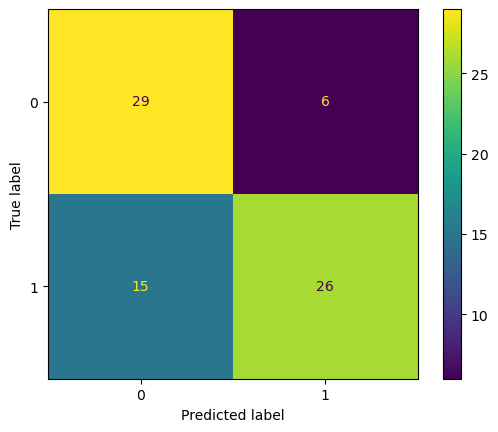

In [38]:
print(ConfusionMatrixDisplay.from_predictions(ytest,y_pred))

In [39]:
print(accuracy_score(ytest,y_pred))

0.7236842105263158


In [41]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        35
           1       0.81      0.63      0.71        41

    accuracy                           0.72        76
   macro avg       0.74      0.73      0.72        76
weighted avg       0.74      0.72      0.72        76



In [42]:
print(confusion_matrix(ytest,y_pred))

[[29  6]
 [15 26]]
